In [1]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, MobileNet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

def load_data(path_data):
    data = []
    labels = []
    for label in os.listdir(path_data):
        path_label = os.path.join(path_data, label)
        for img in os.listdir(path_label):
            path_img = os.path.join(path_label, img)
            image = Image.open(path_img)
            image = image.resize((128, 128))
            image = image.convert('RGB')
            image = np.array(image)
            data.append(image)
            labels.append(1) if label == 'PNEUMONIA' else labels.append(0)
    return data, labels

# Paths\
path = "D:\\Project\\mini_project(5th_Sem)\\DataSet\\chest_xray\\"
path_train = "D:\\Project\\mini_project(5th_Sem)\\DataSet\\chest_xray\\train"
path_test = "D:\\Project\\mini_project(5th_Sem)\\DataSet\\chest_xray\\test"
path_val = "D:\\Project\\mini_project(5th_Sem)\\DataSet\\chest_xray\\val"   

# Load data
x_train, y_train = load_data(path_train)
x_test, y_test = load_data(path_test)
x_val, y_val = load_data(path_val)

# Print data sizes
print(len(x_train))

X = np.array(x_train)
Y = np.array(y_train)
print(X.shape)
print(Y.shape)

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

X = X / 255

5216
(5216, 128, 128, 3)
(5216,)
(624, 128, 128, 3)
(624,)


In [7]:
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.applications import VGG16, MobileNet, ResNet50, InceptionV3, DenseNet121
from keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming X, Y are your data and labels
# Split the data into training and testing sets
X, x_test, Y, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

model_acc=[]
model_pre=[]
model_rec=[]
model_f1=[]
model_cm=[]

history = {}


In [8]:
# Model - MobileNet
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model_mobilenet = Sequential()
model_mobilenet.add(base_model_mobilenet)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(128, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(64, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(32, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(1, activation='sigmoid'))

In [9]:
# List of models
models = {
    #'Simple CNN': model_cnn,
    #'VGG16': model_vgg16,
    'MobileNet': model_mobilenet,
    #'InceptionV3': model_inceptionv3,
    #'DenseNet121': model_densenet121
}

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6302 - loss: 0.8113 - val_accuracy: 0.7464 - val_loss: 0.4436
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8429 - loss: 0.3508 - val_accuracy: 0.7440 - val_loss: 0.7190
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8734 - loss: 0.2878 - val_accuracy: 0.7584 - val_loss: 0.8664
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9194 - loss: 0.1914 - val_accuracy: 0.7536 - val_loss: 1.1777
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9218 - loss: 0.1870 - val_accuracy: 0.7679 - val_loss: 0.8891
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9517 - loss: 0.1252 - val_accuracy: 0.8756 - val_loss: 0.4606
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9531 - loss: 0.1095 - val_accuracy: 0.8852 - val_loss: 0.3757
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9631 - loss: 0.0926 - val_accuracy: 0.9378 - val_loss:

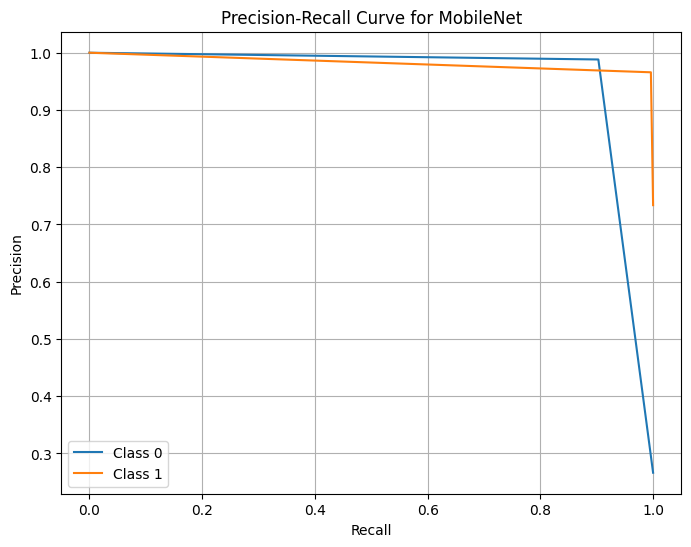

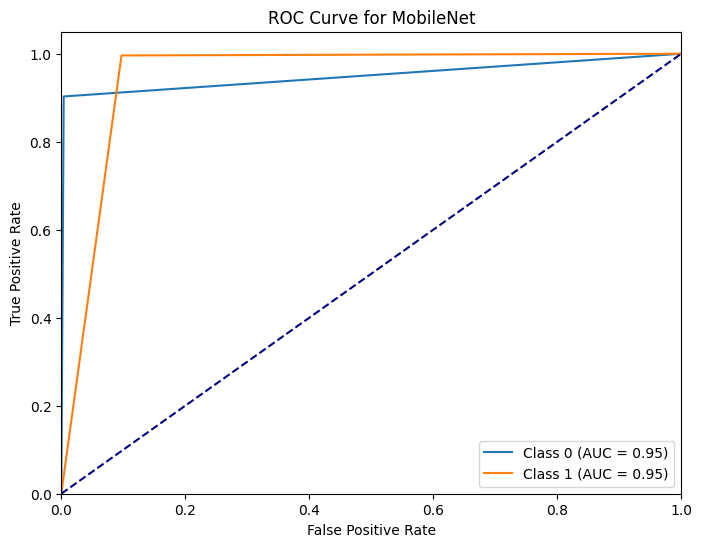

In [10]:
# Training and Evaluation
for model_name, model in models.items():
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    history[model_name] = model.fit(X, Y, epochs=10, batch_size=64, validation_split=0.1)
    
    # Evaluation on test set
    y_pred = model.predict(x_test)
    y_pred = np.round(y_pred)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    model_acc.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    model_pre.append(precision_score(y_test, y_pred, average='weighted'))
    model_rec.append(recall_score(y_test, y_pred, average='weighted'))
    model_f1.append(f1_score(y_test, y_pred, average='weighted'))
    model_cm.append(confusion_matrix(y_test, y_pred))
    # Print or store metrics as needed
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Confusion Matrix:\n{confusion_mat}\n')

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.grid(True)
    classes = [0, 1]
    # Calculate precision-recall curve for each class
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_test == classes[i], y_pred == classes[i])
        plt.plot(recall, precision, label=f'Class {classes[i]}')

    plt.legend()
    plt.savefig(f'{model_name}_precision_recall.png')
    plt.show()

    # Plot ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_pred == classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.savefig(f'{model_name}_ROC_curve.png')
    plt.show()


In [23]:
model.save('chest_xray_mobileNet.h5')